In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from itertools import cycle, islice
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
print("HeHegdjshagllollo Bhai logon...bas bdia hai sab")

HeHegdjshagllollo Bhai logon...bas bdia hai sab


In [3]:
train_file_name = 'drugsComTrain_raw.csv'
test_file_name = 'drugsComTest_raw.csv'
file_path = './data/'

df_test = pd.read_csv(file_path+test_file_name)
df_train = pd.read_csv(file_path+train_file_name)

In [4]:
print("hellodawjk")
df_train.head()

hellodawjk


,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


## Top five conditions

In [5]:
df_train['condition'].value_counts().sort_values(ascending=False)[0:5]

Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: condition, dtype: int64

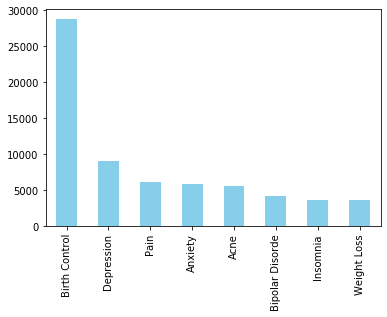

In [6]:
bar_data = df_train['condition'].value_counts().sort_values(ascending=False)[0:8]
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(bar_data)))
ax = bar_data.plot.bar(color='skyblue',stacked=True)
plt.axes(ax)
plt.show()

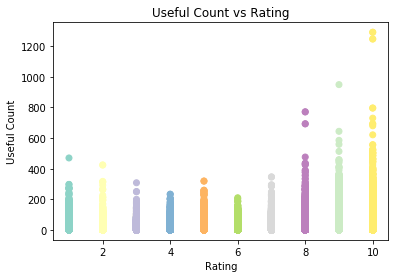

In [7]:
plt.scatter(df_train['rating'], df_train['usefulCount'], c=df_train['rating'].values, cmap='Set3')
plt.title('Useful Count vs Rating')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.show()

In [8]:
vader_analyzer = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = vader_analyzer.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [9]:
sentiments = []
for i in df_train.review:
    sentiments.append(vader_analyzer.polarity_scores(i))
    
sentiments = np.asarray(sentiments)

In [11]:
print(sentiments[2])
df_train.review[2]
df_train.rating[2]

{'neg': 0.038, 'neu': 0.884, 'pos': 0.078, 'compound': 0.7645}


5

In [54]:
# Creates TF-IDF vectorizer and transforms the corpus
vectorizer = TfidfVectorizer()
# vectorizer = HashingVectorizer(n_features=2**14)
X_train = vectorizer.fit_transform(df_train.review)

# transforms test reviews to above vectorized format
X_test = vectorizer.transform(df_test.review)

In [51]:
print(X_train[0].shape)
print(X_train.shape)
print(X_train[2].shape)
print(X_train[3].shape)

(1, 16384)
(161297, 16384)
(1, 16384)
(1, 16384)


In [52]:
y_train = df_train.rating.copy(deep=True)
y_test = df_test.rating.copy(deep=True)

def conver_op(labels):
    for i in range(len(labels)):
        if(labels[i]<3):
            labels[i]=0
        elif(labels[i]<7):
            labels[i]=1
        elif(labels[i]<=10):
            labels[i]=2
    return labels

y_train = conver_op(y_train)
y_test = conver_op(y_test)

In [39]:
y_train[5000:5050]

5000    2
5001    2
5002    2
5003    2
5004    2
5005    2
5006    2
5007    1
5008    2
5009    2
5010    0
5011    2
5012    2
5013    2
5014    2
5015    2
5016    2
5017    0
5018    2
5019    2
5020    1
5021    2
5022    1
5023    0
5024    2
5025    2
5026    2
5027    2
5028    2
5029    1
5030    0
5031    2
5032    1
5033    1
5034    2
5035    1
5036    2
5037    2
5038    2
5039    2
5040    2
5041    2
5042    2
5043    1
5044    2
5045    1
5046    2
5047    0
5048    2
5049    2
Name: rating, dtype: int64

In [53]:

clf = MultinomialNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_train)
# print(predicted[5000:6000])
print(clf.score( X_train, y_train))

# pred_vals = set(predicted)
# print(pred_vals)

# Evaluates model on test set
#pred = rfc_rating.predict(X_test)

#print("Accuracy: %s" % str(rfc_rating.score(X_test, y_test)))
#print("Confusion Matrix")
#print(confusion_matrix(pred, y_test))

ValueError: Input X must be non-negative